# **Melanoma Detection Using Custom Convolutional Neural Network(CNN)**

---
# **Problem Statement**

The goal of this project is to build a multiclass classification model using a custom convolutional neural network in TensorFlow to accurately detect melanoma. Melanoma is a deadly form of skin cancer, accounting for 75% of skin cancer-related deaths. Early detection is critical for improving survival rates. By developing a model that evaluates images of skin lesions and alerts dermatologists about the presence of melanoma, this project aims to reduce manual diagnostic efforts and assist in early detection.

## Dataset

You can download the dataset [https://drive.google.com/file/d/1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs/view?usp=sharing](#). It contains 2,357 images representing various malignant and benign oncological diseases, sourced from the International Skin Imaging Collaboration (ISIC). The dataset is sorted into the following categories:
- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

## Project Pipeline

1. **Data Reading & Understanding**  
   - Define paths for training and testing images.

2. **Dataset Creation**  
   - Create training and validation datasets with a batch size of 32, resizing images to 180x180.

3. **Dataset Visualization**  
   - Visualize one instance of all nine classes in the dataset.

4. **Model Building & Training**  
   - Build a CNN model to accurately detect the nine classes.
   - Rescale images to normalize pixel values between (0, 1).
   - Choose an appropriate optimizer and loss function for training.
   - Train the model for ~20 epochs.
   - Analyze findings to check for model overfitting or underfitting.

5. **Model Building on Augmented Data**
   - Implement a data augmentation strategy to resolve any issues.
   - Repeat the model-building process on augmented data.
   - Train the model for ~20 epochs and assess the improvements.

6. **Class Distribution Analysis**  
   - Examine the class distribution in the training dataset:
     - Identify the class with the least number of samples.
     - Determine which classes dominate in terms of sample proportion.

7. **Handling Class Imbalances**  
   - Rectify class imbalances using the Augmentor library.

8. **Model Building on Rectified Data**  
   - Rebuild and train the model on the class-balanced data for ~30 epochs.
   - Review the results and determine if the class imbalance issue is resolved.

---

# **1. Dataset Reading and Understanding**



> **1.1 Mounting Google Drive Data Folder**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Run the shell command `ls` to list all files and directories in the specified path
!ls /content/drive/MyDrive/CNN_Melanoma/ #The exclamation mark (!) is used in Jupyter notebooks or Google Colab to run shell commands (Linux/Unix commands) from within a Python cell.

'Skin cancer ISIC The International Skin Imaging Collaboration'


> **1.2 Importing Necessary Libraries**

In [4]:
import os  #Provides functions to interact with the operating system, such as navigating directories or handling file paths
import numpy as np #Library for handling arrays and performing mathematical operations efficiently in Python
import matplotlib.pyplot as plt # Plotting library used to create visualizations like graphs and charts
import pandas as pd # Library for data manipulation and analysis
import PIL # PIL (Python Imaging Library), which provides tools for opening, manipulating, and saving images in Python
import tensorflow as tf #Imports the TensorFlow library as tf, a popular deep learning framework used for building and training machine learning models
from tensorflow import keras #Imports the keras module from TensorFlow, a high-level API for building and training neural networks.
from tensorflow.keras import layers, Sequential
from tensorflow.keras import layers #Imports the layers module from Keras, which contains various neural network layers such as convolutional layers, dense layers, pooling layers, etc
from tensorflow.keras.models import Sequential # Imports the Sequential model, a Keras class used to create models layer by layer in a simple, linear stack.
from tensorflow.keras.preprocessing import image_dataset_from_directory #This function helps load image data directly from a directory. It automatically labels images based on the folder structure and can resize them to a given size. This is commonly used for preparing image datasets for training models.
from pathlib import Path #Provides a way to work with file paths in a platform-independent way


In [5]:
pip install --upgrade tensorflow

In [6]:
print(tf.__version__)  # Ensure it's 2.x.x, which includes Keras

2.18.0


> **1.3 Setting Path to Test and Train Data**

In [7]:
# Set the path to the dataset
train_dir = "/content/drive/MyDrive/CNN_Melanoma/Skin_cancer/Train" #Path to training data after loading it in file folder of this ipynb.
test_dir = "/content/drive/MyDrive/CNN_Melanoma/Skin_cancer/Test" #Path to training data after loading it in file folder of this ipynb.

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU'))) #Find no. of GPUs available for this computation.

Num GPUs Available:  1


In [8]:
#List the contents of the Train directory, confirming the correct path and the presence of the images.
print(os.listdir("/content/drive/MyDrive/CNN_Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train"))

['seborrheic keratosis', 'melanoma', 'actinic keratosis', 'basal cell carcinoma', 'nevus', 'vascular lesion', 'dermatofibroma', 'pigmented benign keratosis', 'squamous cell carcinoma']


In [9]:
# Convert string path to Path object
train_dir = Path("/content/drive/MyDrive/CNN_Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
test_dir = Path("/content/drive/MyDrive/CNN_Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

# Iterate over each subdirectory in the training directory
for subdir in train_dir.glob('*'):

    # Check if the current path is a directory (i.e., a folder for a class)
    if subdir.is_dir():

        # Count the number of .jpg images in the current subdirectory
        image_count = len(list(subdir.glob('*.jpg')))

        # Print the name of the subdirectory (class name) and the number of images in it
        print(f"{subdir.name}: {image_count} images")

seborrheic keratosis: 77 images
melanoma: 438 images
actinic keratosis: 114 images
basal cell carcinoma: 376 images
nevus: 357 images
vascular lesion: 139 images
dermatofibroma: 95 images
pigmented benign keratosis: 462 images
squamous cell carcinoma: 181 images


# **2. Dataset Creation**

> **2.1 Defining Parameters for the Loader**

In [10]:
batch_size = 32
img_height = 180
img_width = 180


> **2.2 Using 80% of images for Training and 20% for Validation**

In [11]:
# Set the batch size for loading images into the dataset
batch_size = 32

# Set the target image size for resizing
img_size = (img_height, img_width)

# Create the training dataset from the training directory
train_dataset = image_dataset_from_directory(
    train_dir,                      # Specify the directory containing the training images
    image_size=img_size,           # Resize images to 180x180 pixels
    batch_size=batch_size,          # Load images in batches of 32
    validation_split=0.2,          # Reserve 20% of the data for validation
    subset="training",              # Indicate that this is the training subset
    seed=123                        # Set a random seed for reproducibility
)

# Create the validation dataset from the same training directory
validation_dataset = image_dataset_from_directory(
    train_dir,                      # Specify the same directory containing the training images
    image_size=img_size,           # Resize images to 180x180 pixels
    batch_size=batch_size,          # Load images in batches of 32
    validation_split=0.2,          # Use the same 20% reserved for validation
    subset="validation",            # Indicate that this is the validation subset
    seed=123                        # Use the same random seed for reproducibility
)


Found 29239 files belonging to 9 classes.
Using 23392 files for training.
Found 29239 files belonging to 9 classes.
Using 5847 files for validation.


In [12]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_dataset.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# **3. Dataset Visualization**

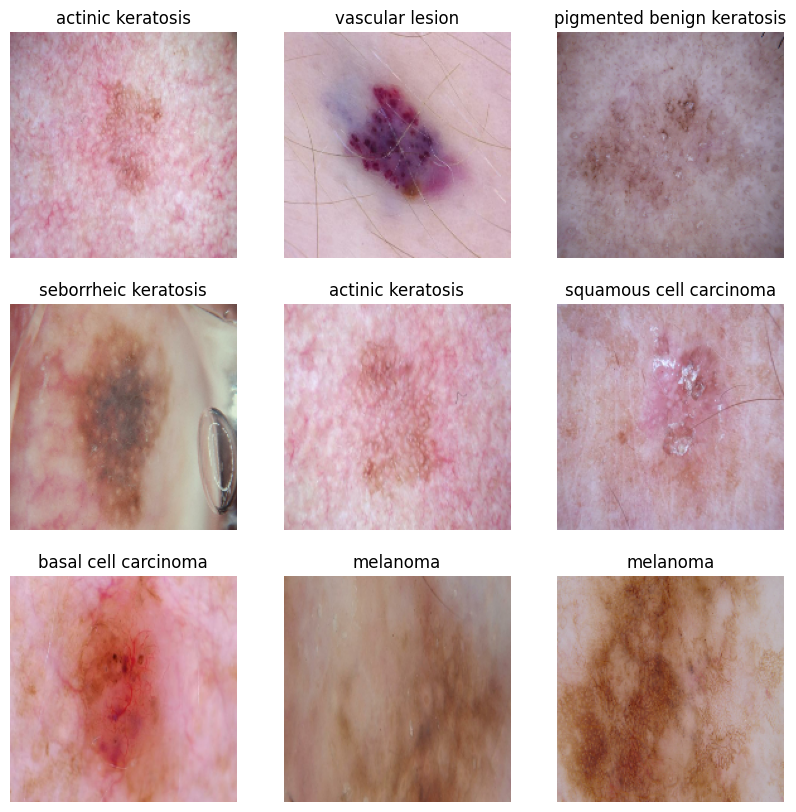

In [13]:
# Importing the pyplot module from matplotlib to create visualizations
plt.figure(figsize=(10, 10))  # Creating a figure of size 10x10 inches for the subplots

# Iterating through the first batch of images and labels in the training dataset
for images, labels in train_dataset.take(1):
    # Looping through the first 9 images in the batch
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)  # Creating a subplot in a 3x3 grid for the i-th image
        plt.imshow(images[i].numpy().astype("uint8"))  # Displaying the i-th image after converting it to a NumPy array and ensuring it's in uint8 format
        plt.title(class_names[labels[i]])  # Setting the title of the subplot to the class name of the i-th image based on its label
        plt.axis("off")  # Hiding the axes for a cleaner look

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# **4. Model Building and Training**

> **4.1 Creating the Model**

In [15]:
num_classes = 9  # Defining the number of target classes (labels) for the classification task, which is 9

# Initializing a Sequential model to build the neural network layer by layer
model = Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Define the input shape explicitly with an Input layer
    layers.Rescaling(1./255),  # Rescaling pixel values from [0, 255] to [0, 1] for normalization

    layers.Conv2D(16, 3, padding='same', activation='relu'),  # Adding a 2D convolutional layer with 16 filters, a 3x3 kernel size, same padding, and ReLU activation function
    layers.MaxPooling2D(),  # Adding a max pooling layer to downsample the feature maps, reducing spatial dimensions while retaining important features

    layers.Conv2D(32, 3, padding='same', activation='relu'),  # Adding another convolutional layer with 32 filters and same padding
    layers.MaxPooling2D(),  # Another max pooling layer to further downsample the feature maps

    layers.Conv2D(64, 3, padding='same', activation='relu'),  # Adding a convolutional layer with 64 filters and same padding
    layers.MaxPooling2D(),  # Another max pooling layer for downsampling

    layers.Flatten(),  # Flattening the 3D feature maps into a 1D vector to prepare for the dense layer
    layers.Dense(128, activation='relu'),  # Adding a fully connected (dense) layer with 128 units and ReLU activation
    layers.Dense(num_classes)  # Adding the final dense layer with units equal to the number of classes (9) without an activation function, as this is typically used for multi-class classification (softmax will be applied later)
])

>**4.2 Compiling the Model**

In [16]:
# Compiling the model with the specified optimizer, loss function, and metrics
model.compile(
    optimizer='adam',  # Using the Adam optimizer for training, which adapts the learning rate during training for better performance
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Specifying the loss function as Sparse Categorical Crossentropy; 'from_logits=True' indicates that the model outputs logits (raw prediction scores) instead of probabilities
    metrics=['accuracy']  # Defining the metrics to track during training and evaluation; here, accuracy is used to measure the model's performance
)

> **4.3 Model Summary**

In [17]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

> **4.4 Training the Model**

In [18]:
epochs = 20
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)


Epoch 1/20
731/731 ━━━━━━━━━━━━━━━━━━━━ 920s 1s/step - accuracy: 0.2918 - loss: 1.8325 - val_accuracy: 0.5059 - val_loss: 1.2721
Epoch 2/20
731/731 ━━━━━━━━━━━━━━━━━━━━ 142s 191ms/step - accuracy: 0.5062 - loss: 1.2822 - val_accuracy: 0.5281 - val_loss: 1.2251
Epoch 3/20
731/731 ━━━━━━━━━━━━━━━━━━━━ 157s 212ms/step - accuracy: 0.5880 - loss: 1.0983 - val_accuracy: 0.5868 - val_loss: 1.0989
Epoch 4/20
731/731 ━━━━━━━━━━━━━━━━━━━━ 201s 210ms/step - accuracy: 0.6440 - loss: 0.9414 - val_accuracy: 0.6526 - val_loss: 0.9631
Epoch 5/20
731/731 ━━━━━━━━━━━━━━━━━━━━ 202s 210ms/step - accuracy: 0.7081 - loss: 0.7759 - val_accuracy: 0.6913 - val_loss: 0.8882
Epoch 6/20
731/731 ━━━━━━━━━━━━━━━━━━━━ 204s 212ms/step - accuracy: 0.7491 - loss: 0.6657 - val_accuracy: 0.6891 - val_loss: 0.9522
Epoch 7/20
731/731 ━━━━━━━━━━━━━━━━━━━━ 188s 194ms/step - accuracy: 0.7859 - loss: 0.5661 - val_accuracy: 0.7026 - val_loss: 0.9534
Epoch 8/20
731/731 ━━━━━━━━━━━━━━━━━━━━ 144s 197ms/step - accuracy: 0.8136 - lo

>**4.5 Visualizing the Training Result**

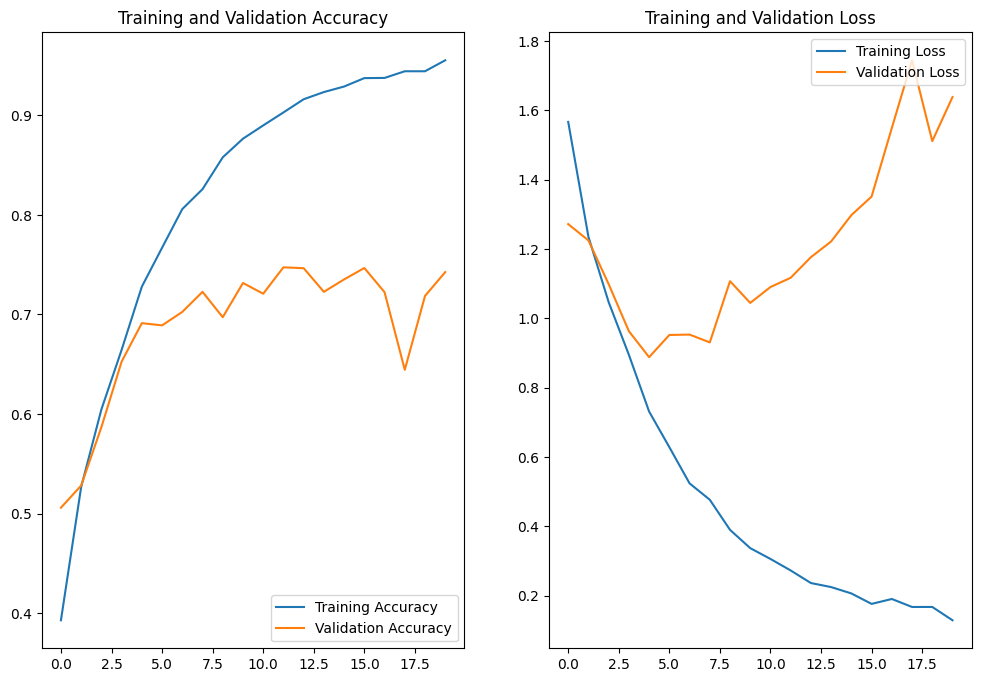

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

---
💡 **Interpretation** -The model shows signs of overfitting, as seen by the divergence between the validation and training curves, particularly after around 10 epochs. This could be mitigated by techniques such as early stopping, regularization, or data augmentation.

---

# **5. Data Augmentation**

> **5.1 Model on Augmented Data**

In [ ]:
# Data augmentation layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

# Apply augmentation to training dataset
augmented_train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x), y))

# Re-train the model on augmented data
history_augmented = model.fit(augmented_train_dataset, validation_data=validation_dataset, epochs=epochs)

Epoch 1/20
731/731 ━━━━━━━━━━━━━━━━━━━━ 219s 299ms/step - accuracy: 0.5263 - loss: 1.4306 - val_accuracy: 0.6803 - val_loss: 0.8639
Epoch 2/20
731/731 ━━━━━━━━━━━━━━━━━━━━ 262s 299ms/step - accuracy: 0.6264 - loss: 0.9770 - val_accuracy: 0.7192 - val_loss: 0.7742
Epoch 3/20
731/731 ━━━━━━━━━━━━━━━━━━━━ 235s 321ms/step - accuracy: 0.6610 - loss: 0.8790 - val_accuracy: 0.7181 - val_loss: 0.7662
Epoch 4/20
731/731 ━━━━━━━━━━━━━━━━━━━━ 235s 321ms/step - accuracy: 0.6837 - loss: 0.8239 - val_accuracy: 0.6785 - val_loss: 0.8615
Epoch 5/20
731/731 ━━━━━━━━━━━━━━━━━━━━ 261s 320ms/step - accuracy: 0.7060 - loss: 0.7690 - val_accuracy: 0.7607 - val_loss: 0.6487
Epoch 6/20
731/731 ━━━━━━━━━━━━━━━━━━━━ 262s 321ms/step - accuracy: 0.7169 - loss: 0.7385 - val_accuracy: 0.7749 - val_loss: 0.6068
Epoch 7/20
731/731 ━━━━━━━━━━━━━━━━━━━━ 263s 322ms/step - accuracy: 0.7402 - loss: 0.6768 - val_accuracy: 0.7748 - val_loss: 0.6329
Epoch 8/20
731/731 ━━━━━━━━━━━━━━━━━━━━ 265s 326ms/step - accuracy: 0.7527 -

>**5.2 Visualizing Augmented Data**

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

>**5.3 Model training and adding Dropout Layer**

In [ ]:
# Using Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),  # Rescaling layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),  # Dropout after the first MaxPooling

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),  # Dropout after the second MaxPooling

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),  # Dropout after the third MaxPooling

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),  # Dropout before the final Dense layer
  layers.Dense(num_classes)
])



>**5.4 Model Compiling**

In [ ]:
model.compile(optimizer='adam',   # optimizer is responsible for updating the model's weights during training in order to minimize the loss function.
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #loss function used for classification tasks where the labels are integers
              metrics=['accuracy']) # to monitor the performance of the model during training and evaluation

> **5.5 Model Fitting**

In [ ]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(  # The `fit()` method is used to train the model.
  train_ds,           # `train_ds` is the training dataset. The model will learn from this data.
  validation_data=val_ds,  # `val_ds` is the validation dataset, used to evaluate the model's performance on unseen data after each epoch.
  epochs=epochs       # `epochs` defines the number of complete passes through the training dataset.
)

>**5.6 Visualizing Augmented Training Data Result**

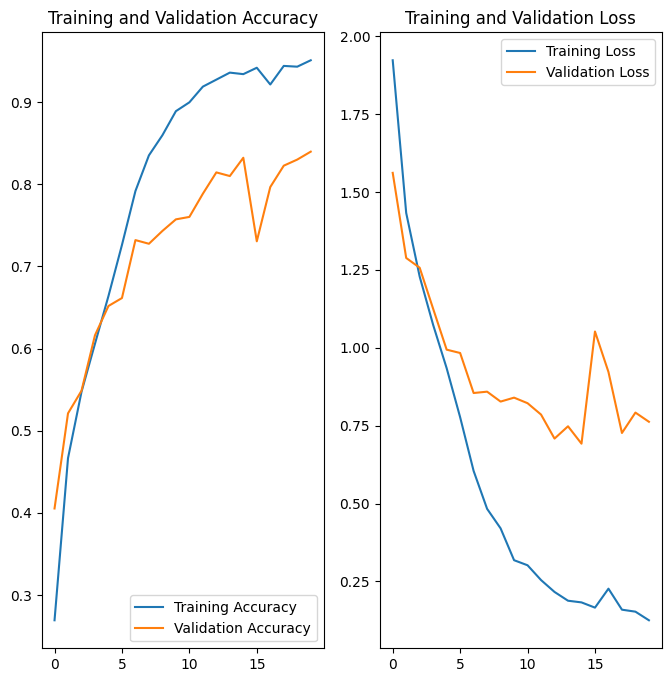

In [ ]:
# Extracting the training accuracy and validation accuracy from the model history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extracting the training loss and validation loss from the model history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Defining the range of epochs for plotting (e.g., 0 to number of epochs - 1)
epochs_range = range(epochs)

# Creating a figure for plotting with a size of 8x8
plt.figure(figsize=(8, 8))

# First subplot for accuracy (1 row, 2 columns, this is the first plot)
plt.subplot(1, 2, 1)

# Plotting training accuracy over the epochs
plt.plot(epochs_range, acc, label='Training Accuracy')

# Plotting validation accuracy over the epochs
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

# Adding a legend in the lower right corner to differentiate the lines
plt.legend(loc='lower right')

# Adding a title to the first plot
plt.title('Training and Validation Accuracy')

# Second subplot for loss (1 row, 2 columns, this is the second plot)
plt.subplot(1, 2, 2)

# Plotting training loss over the epochs
plt.plot(epochs_range, loss, label='Training Loss')

# Plotting validation loss over the epochs
plt.plot(epochs_range, val_loss, label='Validation Loss')

# Adding a legend in the upper right corner to differentiate the lines
plt.legend(loc='upper right')

# Adding a title to the second plot
plt.title('Training and Validation Loss')

# Displaying the plot
plt.show()


---
##### 💡 **Interpretation**: With the help of augmented data, the problem of overfitting is mitigated.Training and validation accuracy of the above model are in the same range.The model is performing poorly both on training data and validation data- i.e. the model is underfitting now.
---

# **6. Class Distribution Analysis**

>**6.1 Understanding Data Structure**

In [ ]:
# Importing the glob module to retrieve files/pathnames matching a specified pattern
from glob import glob

# Creating a list of all .jpg file paths in the training directory (train_dir) and its subdirectories
# The pattern '*/' is used to match subdirectories and '*.jpg' to match JPEG images
path_list = [x for x in glob(os.path.join(train_dir, '*', '*.jpg'))]

# Creating a list of lesion types (directory names) for each image by retrieving the parent folder's name of each .jpg file
# os.path.dirname(y) gets the directory name, and os.path.basename extracts the last folder name (lesion type)
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(train_dir, '*', '*.jpg'))]

# Printing the total number of lesion labels (or images) found
print(len(lesion_list))


2239


In [ ]:
# Creating a dictionary by zipping two lists: path_list (keys) and lesion_list (values)
cd_dict_original = dict(zip(path_list, lesion_list))

# Printing the first two key-value pairs of the dictionary (for verification or inspection)
print(list(cd_dict_original.items())[:2])

[('/content/drive/MyDrive/CNN_Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/ISIC_0010866.jpg', 'seborrheic keratosis'), ('/content/drive/MyDrive/CNN_Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/ISIC_0010900.jpg', 'seborrheic keratosis')]


In [ ]:
#Dataframe for path and label
original_cd = pd.DataFrame(list(cd_dict_original.items()), columns=['Path','Label'])
original_cd.head()

,Path,Label
0,/content/drive/MyDrive/CNN_Melanoma/Skin cance...,seborrheic keratosis
1,/content/drive/MyDrive/CNN_Melanoma/Skin cance...,seborrheic keratosis
2,/content/drive/MyDrive/CNN_Melanoma/Skin cance...,seborrheic keratosis
3,/content/drive/MyDrive/CNN_Melanoma/Skin cance...,seborrheic keratosis
4,/content/drive/MyDrive/CNN_Melanoma/Skin cance...,seborrheic keratosis


>**6.2 Counting instances of each class**

In [ ]:
original_cd[['Label']].value_counts()

,count
Label,
pigmented benign keratosis,462
melanoma,438
basal cell carcinoma,376
nevus,357
squamous cell carcinoma,181
vascular lesion,139
actinic keratosis,114
dermatofibroma,95
seborrheic keratosis,77


>**6.3 Checking propotion of each class**

In [ ]:
original_cd[['Label']].value_counts(normalize=True)

,proportion
Label,
pigmented benign keratosis,0.206342
melanoma,0.195623
basal cell carcinoma,0.167932
nevus,0.159446
squamous cell carcinoma,0.080840
vascular lesion,0.062081
actinic keratosis,0.050916
dermatofibroma,0.042430
seborrheic keratosis,0.034390


>**6.4 Visualize Class Distribution**

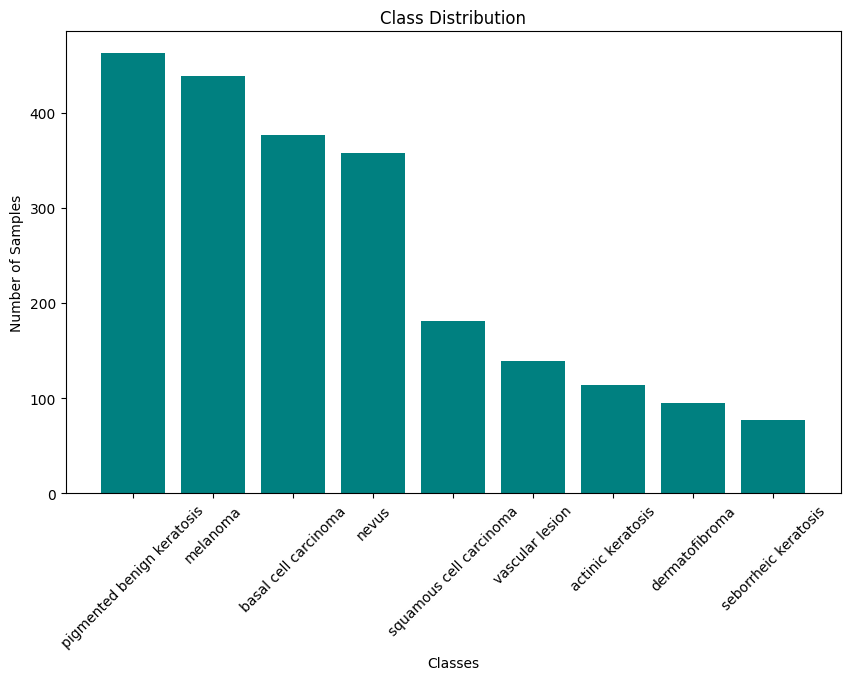

In [ ]:
# Create a DataFrame from the dictionary (already did this)
original_cd = pd.DataFrame(list(cd_dict_original.items()), columns=['Path', 'Label'])

# Get the class distribution by counting the occurrences of each label
class_distribution = original_cd['Label'].value_counts()

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.index, class_distribution.values, color='teal')

plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


#**7.Handling Class Imbalance**

>**7.1 Install Augmenter**

In [ ]:
!pip install Augmentor


>**7.2 Setup Augmenter Pipeline**

In [ ]:
# path_to_training_dataset=str(train_dir) + '/'
# import Augmentor
# for i in class_names:
#     p = Augmentor.Pipeline(path_to_training_dataset + i)
#     p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
#     p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D53EAB21690>: 100%|██████████| 500/500 [00:20<00:00, 23.99 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D53EA873DC0>: 100%|██████████| 500/500 [00:18<00:00, 26.60 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D53EABBFCD0>: 100%|██████████| 500/500 [00:21<00:00, 23.79 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D53EAB210F0>: 100%|██████████| 500/500 [01:28<00:00,  5.66 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D53EA832260>: 100%|██████████| 500/500 [01:19<00:00,  6.26 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D53EA51BD30>: 100%|██████████| 500/500 [00:20<00:00, 24.24 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D53EAB9A560>: 100%|██████████| 500/500 [00:37<00:00, 13.21 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D54641704C0>: 100%|██████████| 500/500 [00:20<00:00, 24.36 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D53EAAA5630>: 100%|██████████| 500/500 [00:18<00:00, 26.48 Samples/s]


In [ ]:
import Augmentor
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the output directory for augmented images
output_dir = "augmented_images"

# Create directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to balance data using Augmentor
def augment_class_images(df, class_name, sample_size, output_dir):
    class_images = df[df['Label'] == class_name]
    p = Augmentor.Pipeline(source_directory=class_images['Path'].values[0], output_directory=output_dir)

    # Define the augmentation operations
    p.rotate(probability=0.7, max_left_rotation=25, max_right_rotation=25)
    p.zoom_random(probability=0.5, percentage_area=0.8)
    p.flip_left_right(probability=0.5)
    p.flip_top_bottom(probability=0.5)

    # Sample (augment) images to balance the dataset
    p.sample(sample_size)

# Load your original dataframe (assuming original_cd is already your DataFrame)
class_counts = original_cd['Label'].value_counts()

# Determine the target number of images for each class (equal to the majority class)
target_sample_size = class_counts.max()

# Loop over each class and apply augmentation for the minority classes
for class_name, count in class_counts.items():
    if count < target_sample_size:
        augment_class_images(original_cd, class_name, target_sample_size - count, output_dir)

# Now, the output directory contains augmented images that you can load for training


In [ ]:
import glob

# Gather the augmented images
augmented_image_paths = glob.glob(os.path.join(output_dir, '*/*.jpg'))

# Create a DataFrame for the augmented images
augmented_df = pd.DataFrame({
    'Path': augmented_image_paths,
    'Label': [class_name] * len(augmented_image_paths)  # Assign the correct label to the augmented images
})

# Combine the original and augmented data
balanced_df = pd.concat([original_cd, augmented_df], ignore_index=True)

# Shuffle the dataset to mix augmented and original images
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

# Split the balanced dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    balanced_df['Path'], balanced_df['Label'], test_size=0.2, stratify=balanced_df['Label'], random_state=42
)


# **8. Model Building on Rectified Data**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for loading and augmenting the images
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create generators for train and validation sets
train_generator = datagen.flow_from_dataframe(
    balanced_df,
    x_col='Path',
    y_col='Label',
    target_size=(image_height, image_width),  # Define based on your model
    batch_size=batch_size,
    class_mode='categorical'  # Assuming it's a multi-class classification problem
)

val_generator = datagen.flow_from_dataframe(
    balanced_df,
    x_col='Path',
    y_col='Label',
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'
)


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=30,  # Adjust the number of epochs as needed
    validation_data=val_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_steps=len(X_val) // batch_size
)

# Save the model
model.save("balanced_model.h5")


In [ ]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_generator)

print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


In [ ]:
image_count_train = len(list(train_dir.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:
path_list_new = [x for x in glob(os.path.join(train_dir, '*','output', '*.jpg'))]
path_list_new[:2]

['/content/drive/MyDrive/CNN_Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010878.jpg_8b3c0c27-e55c-481d-8ab0-e748edbee953.jpg',
 '/content/drive/MyDrive/CNN_Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011056.jpg_ee7a5443-e5c0-451f-9eca-c9863feea9d5.jpg']

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(train_dir, '*','output', '*.jpg'))]
lesion_list_new[:2]

['seborrheic keratosis', 'seborrheic keratosis']

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns=['Path', 'Label'])
new_df = pd.concat([original_df, df2], ignore_index=True)
new_df.shape

(6739, 2)

In [ ]:
# Checking the class distribution after adding 500 samples per label
new_df['Label'].value_counts(normalize=True)

,proportion
Label,
pigmented benign keratosis,0.142751
melanoma,0.139190
basal cell carcinoma,0.129990
nevus,0.127170
squamous cell carcinoma,0.101054
vascular lesion,0.094821
actinic keratosis,0.091111
dermatofibroma,0.088292
seborrheic keratosis,0.085621


In [ ]:
new_df['Label'].value_counts()

,count
Label,
pigmented benign keratosis,962
melanoma,938
basal cell carcinoma,876
nevus,857
squamous cell carcinoma,681
vascular lesion,639
actinic keratosis,614
dermatofibroma,595
seborrheic keratosis,577


In [ ]:
new_df.head()

,Path,Label
0,/content/drive/MyDrive/CNN_Melanoma/Skin cance...,seborrheic keratosis
1,/content/drive/MyDrive/CNN_Melanoma/Skin cance...,seborrheic keratosis
2,/content/drive/MyDrive/CNN_Melanoma/Skin cance...,seborrheic keratosis
3,/content/drive/MyDrive/CNN_Melanoma/Skin cance...,seborrheic keratosis
4,/content/drive/MyDrive/CNN_Melanoma/Skin cance...,seborrheic keratosis


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# if no changes made

# train_dir="path to directory with training data + data created using augmentor"
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),  # Use layers.Rescaling instead of experimental
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 30

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 215ms/step - accuracy: 0.6636 - loss: 0.9132 - val_accuracy: 0.5702 - val_loss: 1.1740
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 215ms/step - accuracy: 0.6845 - loss: 0.8503 - val_accuracy: 0.6140 - val_loss: 1.0667
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 217ms/step - accuracy: 0.7085 - loss: 0.7703 - val_accuracy: 0.6132 - val_loss: 1.1152
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - accuracy: 0.6881 - loss: 0.8157 - val_accuracy: 0.5843 - val_loss: 1.2106
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 216ms/step - accuracy: 0.7390 - loss: 0.7173 - val_accuracy: 0.6333 - val_loss: 1.0466
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 149ms/step - accuracy: 0.7174 - loss: 0.7578 - val_accuracy: 0.5583 - val_loss: 1.2711
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - accuracy: 0.6554 - loss: 0.8714 - val_accuracy: 0.5999 - val_loss: 1.2053
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 148ms/step - accuracy: 0.7105 - loss: 0.8155 - val_accur

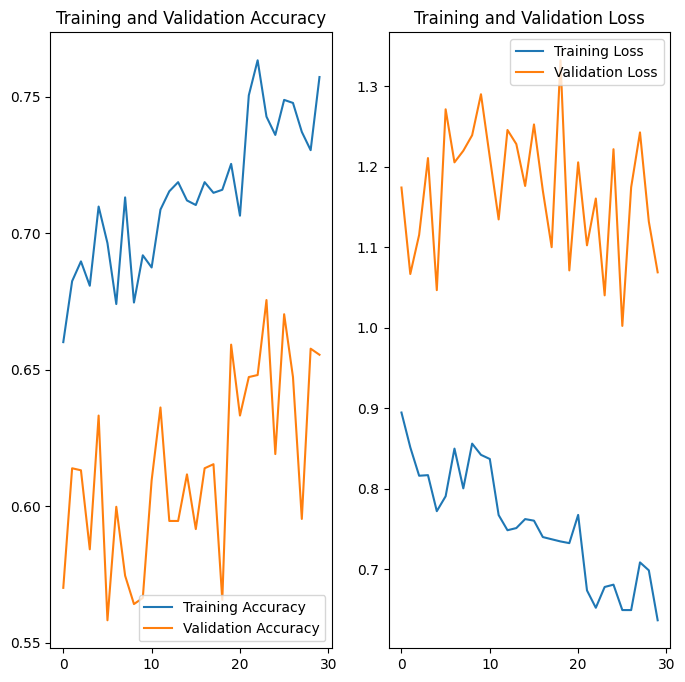

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


AS per my discussion with TA and Upgrad buddy I am submitting the following code with less accuracy due to underlying **#GPU COMPUTATIONAL CRUNCH ISSUE**.
I hope my request would be considered for grading.